# Example how to work with other spectra
- convert spectra to the Detector energy grid
- get effective readings

In [14]:
# %pip install bssunfold pandas numpy matplotlib pandas

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgb
from collections import defaultdict
import pandas as pd
from bssunfold import Detector

## Load the response functions file for the BSS
- first column: Energy in MeV
- other columns: detector responses for the set of moderator spheres

In [16]:
# response functions default GSF
from bssunfold import RF_GSF, RF_LANL
df = pd.DataFrame.from_dict(RF_LANL, orient='columns')
Detector_GSF = Detector(df)

## Test spectrum in different energy grid

In [17]:
# test spectrum
test_spectrum = {
    "E_MeV": [
        1e-09,
        2.5e-09,
        1.6e-08,
        6.3e-08,
        1.6e-07,
        2.5e-07,
        2.5e-06,
        4e-06,
        6.3e-06,
        1.6e-05,
        2.5e-05,
        6.3e-05,
        0.0004,
        0.001,
        0.0016,
        0.0025,
        0.004,
        0.04,
        0.16,
        1.0,
        4.0,
        6.3,
        63.0,
        160.0,
        250.0,
    ],
    "Phi": [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0064,
        0.045,
        0.36,
        0.28,
        0.086,
        0.0,
        0.0,
        0.0,
    ],
}

# Plot
 - interpolation to the Detector energy grid

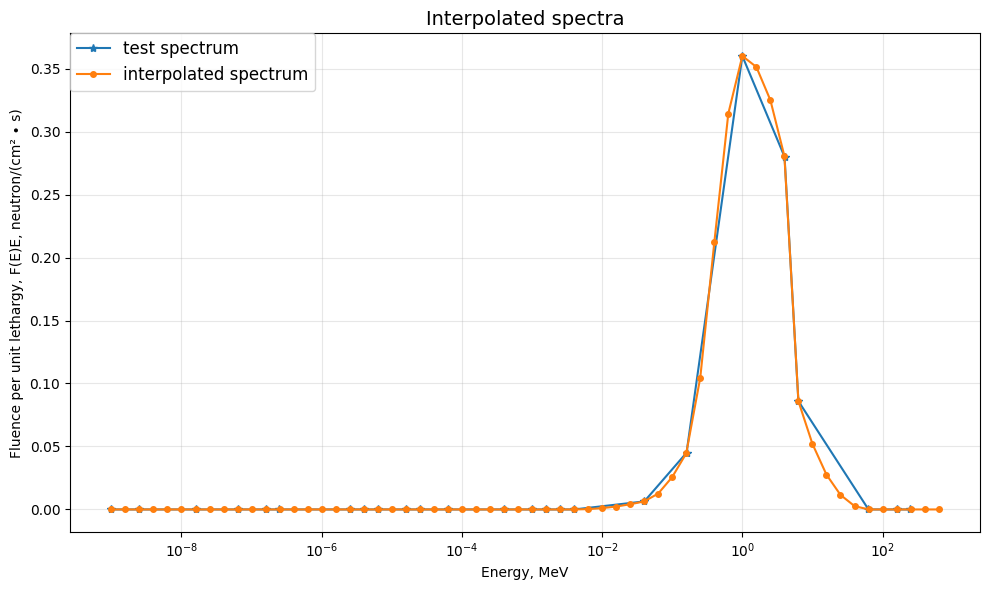

In [18]:
interpolated_spectrum = Detector_GSF.discretize_spectra(test_spectrum)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(test_spectrum["E_MeV"], test_spectrum["Phi"], label="test spectrum", marker='*', markersize=6)
ax.plot(
    interpolated_spectrum["E_MeV"],
    interpolated_spectrum["Phi"],
    label="interpolated spectrum",
    marker='o',
    markersize=4,
)
ax.set_xscale("log")
ax.legend(loc="upper left", borderaxespad=0.0, fontsize=12)
ax.grid(True, alpha=0.3)
ax.set_xlabel("Energy, MeV")
ax.set_ylabel("Fluence per unit lethargy, F(E)E, neutron/(cm² ∙ s)")
ax.set_title(f"Interpolated spectra", fontsize=14)
plt.tight_layout()
plt.show()
plt.close()

# Get effective detector readings for the test spectrum

In [19]:
# first interpolate the spectrum, then get the readings according to the detector response functions.
eff_readings = Detector_GSF.get_effective_readings_for_spectra(test_spectrum)
print(eff_readings)

{'3in': 0.3756264560920935, '4in': 1.2472241929883845, '5in': 1.8176226237355264, '6in': 2.5266429800052714, '8in': 2.534191980356945, '9in': 2.5287144849995267, '12in': 1.6881230648246595, '18in': 0.4932805821553776, '9inPb': 2.629557394948418, '12inPb': 1.884794919010304, '18inPb': 0.6082429593837522}
